In [154]:
#Importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [155]:
base_donnees = pd.read_csv("Donnés\BaseDeDonneesPlusComplete1970-2025.csv",index_col = "date")
#creeer une nouvelle colonne pour predire contenant la prediction de s'il va neiger et pleuvoir.
base_donnees["It's raining"] = base_donnees["rain"]>0
base_donnees["It's snowing"] = base_donnees["snow"]>0
del base_donnees["sunset_hhmm"]
del base_donnees["sunrise_hhmm"]
base_donnees = base_donnees.iloc[::-1]
choix_predicteur = input("Vous voulez prédire la neige N ou la pluie P : ")



C:\Users\test8\AppData\Local\Temp\ipykernel_6000\3007904357.py:1: DtypeWarning: Columns (46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  base_donnees = pd.read_csv("Donnés\BaseDeDonneesPlusComplete1970-2025.csv",index_col = "date")


In [156]:
#Voir les pourcentages de manque de donnes dans chaque colonnes
null_prc = base_donnees.isnull().sum()/base_donnees.shape[0]
null_prc

max_temperature              0.000000
avg_hourly_temperature       0.000000
avg_temperature              0.000000
min_temperature              0.000000
max_humidex                  0.747783
                               ...   
avg_hourly_cloud_cover_10    0.994154
avg_cloud_cover_10           0.994154
min_cloud_cover_10           0.994154
It's raining                 0.000000
It's snowing                 0.000000
Length: 71, dtype: float64

In [157]:
#Trier les colonnes valide avec peu de manque de donnees.
colonne_valide = base_donnees.columns[null_prc<.05].copy()
colonne_valide.shape[0]

38

In [158]:
#Creer nouvelle base de donnes nettoyée
base_donnees = base_donnees[colonne_valide]
base_donnees

,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,max_dew_point,avg_hourly_dew_point,...,heatdegdays,cooldegdays,growdegdays_5,growdegdays_7,growdegdays_10,precipitation,rain,snow,It's raining,It's snowing
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01,-13.9,-17.65,-18.35,-22.8,59,52.2,53.0,47,-22.2,-25.1,...,36.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
1970-01-02,-11.7,-14.84,-14.75,-17.8,59,55.4,54.5,50,-19.4,-21.8,...,32.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
1970-01-03,-10.0,-18.01,-16.95,-23.9,76,61.0,59.5,43,-21.1,-23.9,...,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
1970-01-04,-15.6,-21.03,-21.70,-27.8,79,68.1,68.5,58,-18.9,-25.3,...,39.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
1970-01-05,-10.6,-14.87,-17.50,-24.4,87,79.5,74.0,61,-12.2,-17.5,...,35.5,0.0,0.0,0.0,0.0,1.5,0.0,2.3,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-02,1.4,-2.20,-2.80,-7.0,93,48.5,62.0,31,-1.3,-12.3,...,20.8,0.0,0.0,0.0,0.0,1.6,0.2,1.4,True,True
2025-04-03,18.8,8.31,9.60,0.4,93,77.2,69.5,46,11.9,4.1,...,8.4,0.0,4.6,2.6,0.0,22.4,22.4,0.0,True,False
2025-04-04,10.6,6.77,6.90,3.2,69,53.2,54.0,39,-0.3,-2.3,...,11.1,0.0,1.9,0.0,0.0,0.0,0.0,0.0,False,False


In [159]:
#Étape pour trouver le manque de données se situe ou.
null_prc = base_donnees.isnull().sum()/base_donnees.shape[0]
null_prc

max_temperature                 0.000000
avg_hourly_temperature          0.000000
avg_temperature                 0.000000
min_temperature                 0.000000
max_relative_humidity           0.000000
avg_hourly_relative_humidity    0.000000
avg_relative_humidity           0.000000
min_relative_humidity           0.000000
max_dew_point                   0.000000
avg_hourly_dew_point            0.000000
avg_dew_point                   0.000000
min_dew_point                   0.000000
max_wind_speed                  0.000000
avg_hourly_wind_speed           0.000000
avg_wind_speed                  0.000000
min_wind_speed                  0.000000
max_pressure_sea                0.000000
avg_hourly_pressure_sea         0.000000
avg_pressure_sea                0.000000
min_pressure_sea                0.000000
max_pressure_station            0.000000
avg_hourly_pressure_station     0.000000
avg_pressure_station            0.000000
min_pressure_station            0.000000
max_visibility  

In [160]:
#Technique de remplissage impeu brute qui remplace les valeurs vide par la valeur de l'ancienne journée
base_donnees = base_donnees.ffill()
#Verification de manque de données aprés remplissage.
null_prc = base_donnees.isnull().sum()/base_donnees.shape[0]
null_prc

max_temperature                 0.0
avg_hourly_temperature          0.0
avg_temperature                 0.0
min_temperature                 0.0
max_relative_humidity           0.0
avg_hourly_relative_humidity    0.0
avg_relative_humidity           0.0
min_relative_humidity           0.0
max_dew_point                   0.0
avg_hourly_dew_point            0.0
avg_dew_point                   0.0
min_dew_point                   0.0
max_wind_speed                  0.0
avg_hourly_wind_speed           0.0
avg_wind_speed                  0.0
min_wind_speed                  0.0
max_pressure_sea                0.0
avg_hourly_pressure_sea         0.0
avg_pressure_sea                0.0
min_pressure_sea                0.0
max_pressure_station            0.0
avg_hourly_pressure_station     0.0
avg_pressure_station            0.0
min_pressure_station            0.0
max_visibility                  0.0
avg_hourly_visibility           0.0
avg_visibility                  0.0
min_visibility              

In [161]:
base_donnees.info()
#Retire les espaces devant les titres des columns pour réduire l'espace utilisé
base_donnees.columns = base_donnees.columns.str.strip()

<class 'pandas.core.frame.DataFrame'>
Index: 20185 entries, 1970-01-01 to 2025-04-06
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   max_temperature               20185 non-null  float64
 1   avg_hourly_temperature        20185 non-null  float64
 2   avg_temperature               20185 non-null  float64
 3   min_temperature               20185 non-null  float64
 4   max_relative_humidity         20185 non-null  int64  
 5   avg_hourly_relative_humidity  20185 non-null  float64
 6   avg_relative_humidity         20185 non-null  float64
 7   min_relative_humidity         20185 non-null  int64  
 8   max_dew_point                 20185 non-null  float64
 9   avg_hourly_dew_point          20185 non-null  float64
 10  avg_dew_point                 20185 non-null  float64
 11  min_dew_point                 20185 non-null  float64
 12  max_wind_speed                20185 non-null  int64

In [162]:
base_donnees.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20185 entries, 1970-01-01 to 2025-04-06
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   max_temperature               20185 non-null  float64
 1   avg_hourly_temperature        20185 non-null  float64
 2   avg_temperature               20185 non-null  float64
 3   min_temperature               20185 non-null  float64
 4   max_relative_humidity         20185 non-null  int64  
 5   avg_hourly_relative_humidity  20185 non-null  float64
 6   avg_relative_humidity         20185 non-null  float64
 7   min_relative_humidity         20185 non-null  int64  
 8   max_dew_point                 20185 non-null  float64
 9   avg_hourly_dew_point          20185 non-null  float64
 10  avg_dew_point                 20185 non-null  float64
 11  min_dew_point                 20185 non-null  float64
 12  max_wind_speed                20185 non-null  int64

In [163]:
#Transformer mes valeurs de True/False de it's raining & it's snowing pour 1/0.
base_donnees["It's raining"] = base_donnees["It's raining"].map({True:1,False:0})
base_donnees["It's snowing"] = base_donnees["It's snowing"].map({True:1,False:0})
base_donnees

,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,max_dew_point,avg_hourly_dew_point,...,heatdegdays,cooldegdays,growdegdays_5,growdegdays_7,growdegdays_10,precipitation,rain,snow,It's raining,It's snowing
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01,-13.9,-17.65,-18.35,-22.8,59,52.2,53.0,47,-22.2,-25.1,...,36.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1970-01-02,-11.7,-14.84,-14.75,-17.8,59,55.4,54.5,50,-19.4,-21.8,...,32.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1970-01-03,-10.0,-18.01,-16.95,-23.9,76,61.0,59.5,43,-21.1,-23.9,...,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1970-01-04,-15.6,-21.03,-21.70,-27.8,79,68.1,68.5,58,-18.9,-25.3,...,39.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1970-01-05,-10.6,-14.87,-17.50,-24.4,87,79.5,74.0,61,-12.2,-17.5,...,35.5,0.0,0.0,0.0,0.0,1.5,0.0,2.3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-02,1.4,-2.20,-2.80,-7.0,93,48.5,62.0,31,-1.3,-12.3,...,20.8,0.0,0.0,0.0,0.0,1.6,0.2,1.4,1,1
2025-04-03,18.8,8.31,9.60,0.4,93,77.2,69.5,46,11.9,4.1,...,8.4,0.0,4.6,2.6,0.0,22.4,22.4,0.0,1,0
2025-04-04,10.6,6.77,6.90,3.2,69,53.2,54.0,39,-0.3,-2.3,...,11.1,0.0,1.9,0.0,0.0,0.0,0.0,0.0,0,0


In [164]:
#Parametrer les graphes.
sns.set_style(style="whitegrid")
base_donnees.describe()

,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,max_dew_point,avg_hourly_dew_point,...,heatdegdays,cooldegdays,growdegdays_5,growdegdays_7,growdegdays_10,precipitation,rain,snow,It's raining,It's snowing
count,20185.000000,20185.000000,20185.000000,20185.000000,20185.000000,20185.000000,20185.000000,20185.000000,20185.000000,20185.000000,...,20185.000000,20185.000000,20185.000000,20185.000000,20185.000000,20185.000000,20185.000000,20185.000000,20185.000000,20185.000000
mean,11.527644,7.077297,6.805789,2.085078,86.095566,69.913228,69.832326,53.569086,4.802190,1.516265,...,11.980986,0.786292,6.034754,4.956577,3.516701,2.785747,2.188690,0.587555,0.327818,0.161754
std,12.433590,11.845952,11.891263,11.629878,10.308155,12.369964,11.061568,14.729302,11.069992,11.594874,...,10.915638,1.843639,6.849860,6.068224,4.869089,6.472489,6.014275,2.443883,0.469430,0.368234
min,-27.200000,-31.140000,-30.350000,-35.200000,34.000000,23.800000,25.500000,11.000000,-34.400000,-38.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.700000,-1.650000,-2.200000,-6.100000,80.000000,61.800000,63.000000,43.000000,-2.800000,-6.600000,...,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.400000,7.940000,7.650000,2.800000,89.000000,70.500000,70.500000,53.000000,5.400000,2.100000,...,10.300000,0.000000,2.600000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22.600000,17.520000,17.200000,11.800000,94.000000,78.800000,77.500000,63.000000,14.300000,11.300000,...,20.200000,0.000000,12.200000,10.200000,7.200000,2.200000,1.000000,0.000000,1.000000,0.000000
max,37.800000,29.860000,30.290000,24.800000,100.000000,100.000000,100.000000,100.000000,26.100000,23.800000,...,48.400000,12.300000,25.300000,23.300000,20.300000,154.000000,154.000000,45.600000,1.000000,1.000000


In [165]:
base_donnees.dtypes
base_donnees.columns

Index(['max_temperature', 'avg_hourly_temperature', 'avg_temperature',
       'min_temperature', 'max_relative_humidity',
       'avg_hourly_relative_humidity', 'avg_relative_humidity',
       'min_relative_humidity', 'max_dew_point', 'avg_hourly_dew_point',
       'avg_dew_point', 'min_dew_point', 'max_wind_speed',
       'avg_hourly_wind_speed', 'avg_wind_speed', 'min_wind_speed',
       'max_pressure_sea', 'avg_hourly_pressure_sea', 'avg_pressure_sea',
       'min_pressure_sea', 'max_pressure_station',
       'avg_hourly_pressure_station', 'avg_pressure_station',
       'min_pressure_station', 'max_visibility', 'avg_hourly_visibility',
       'avg_visibility', 'min_visibility', 'heatdegdays', 'cooldegdays',
       'growdegdays_5', 'growdegdays_7', 'growdegdays_10', 'precipitation',
       'rain', 'snow', 'It's raining', 'It's snowing'],
      dtype='object')

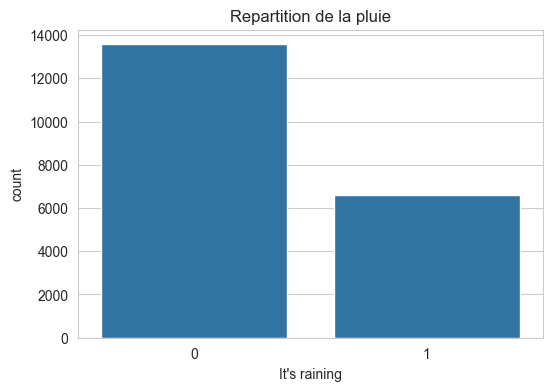

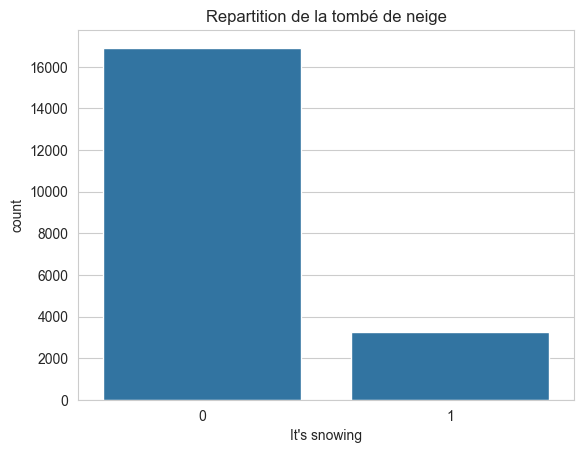

In [166]:
#Voir la comparaison entre le nombre de jour qu'il pleu/pleu pas et le nombre de jour ou il neige/il neige pas.

plt.figure(figsize=(6,4))

sns.countplot(x="It's raining",data = base_donnees)
plt.title("Repartition de la pluie")
plt.show()
sns.countplot(x="It's snowing",data = base_donnees)
plt.title("Repartition de la tombé de neige")
plt.show()





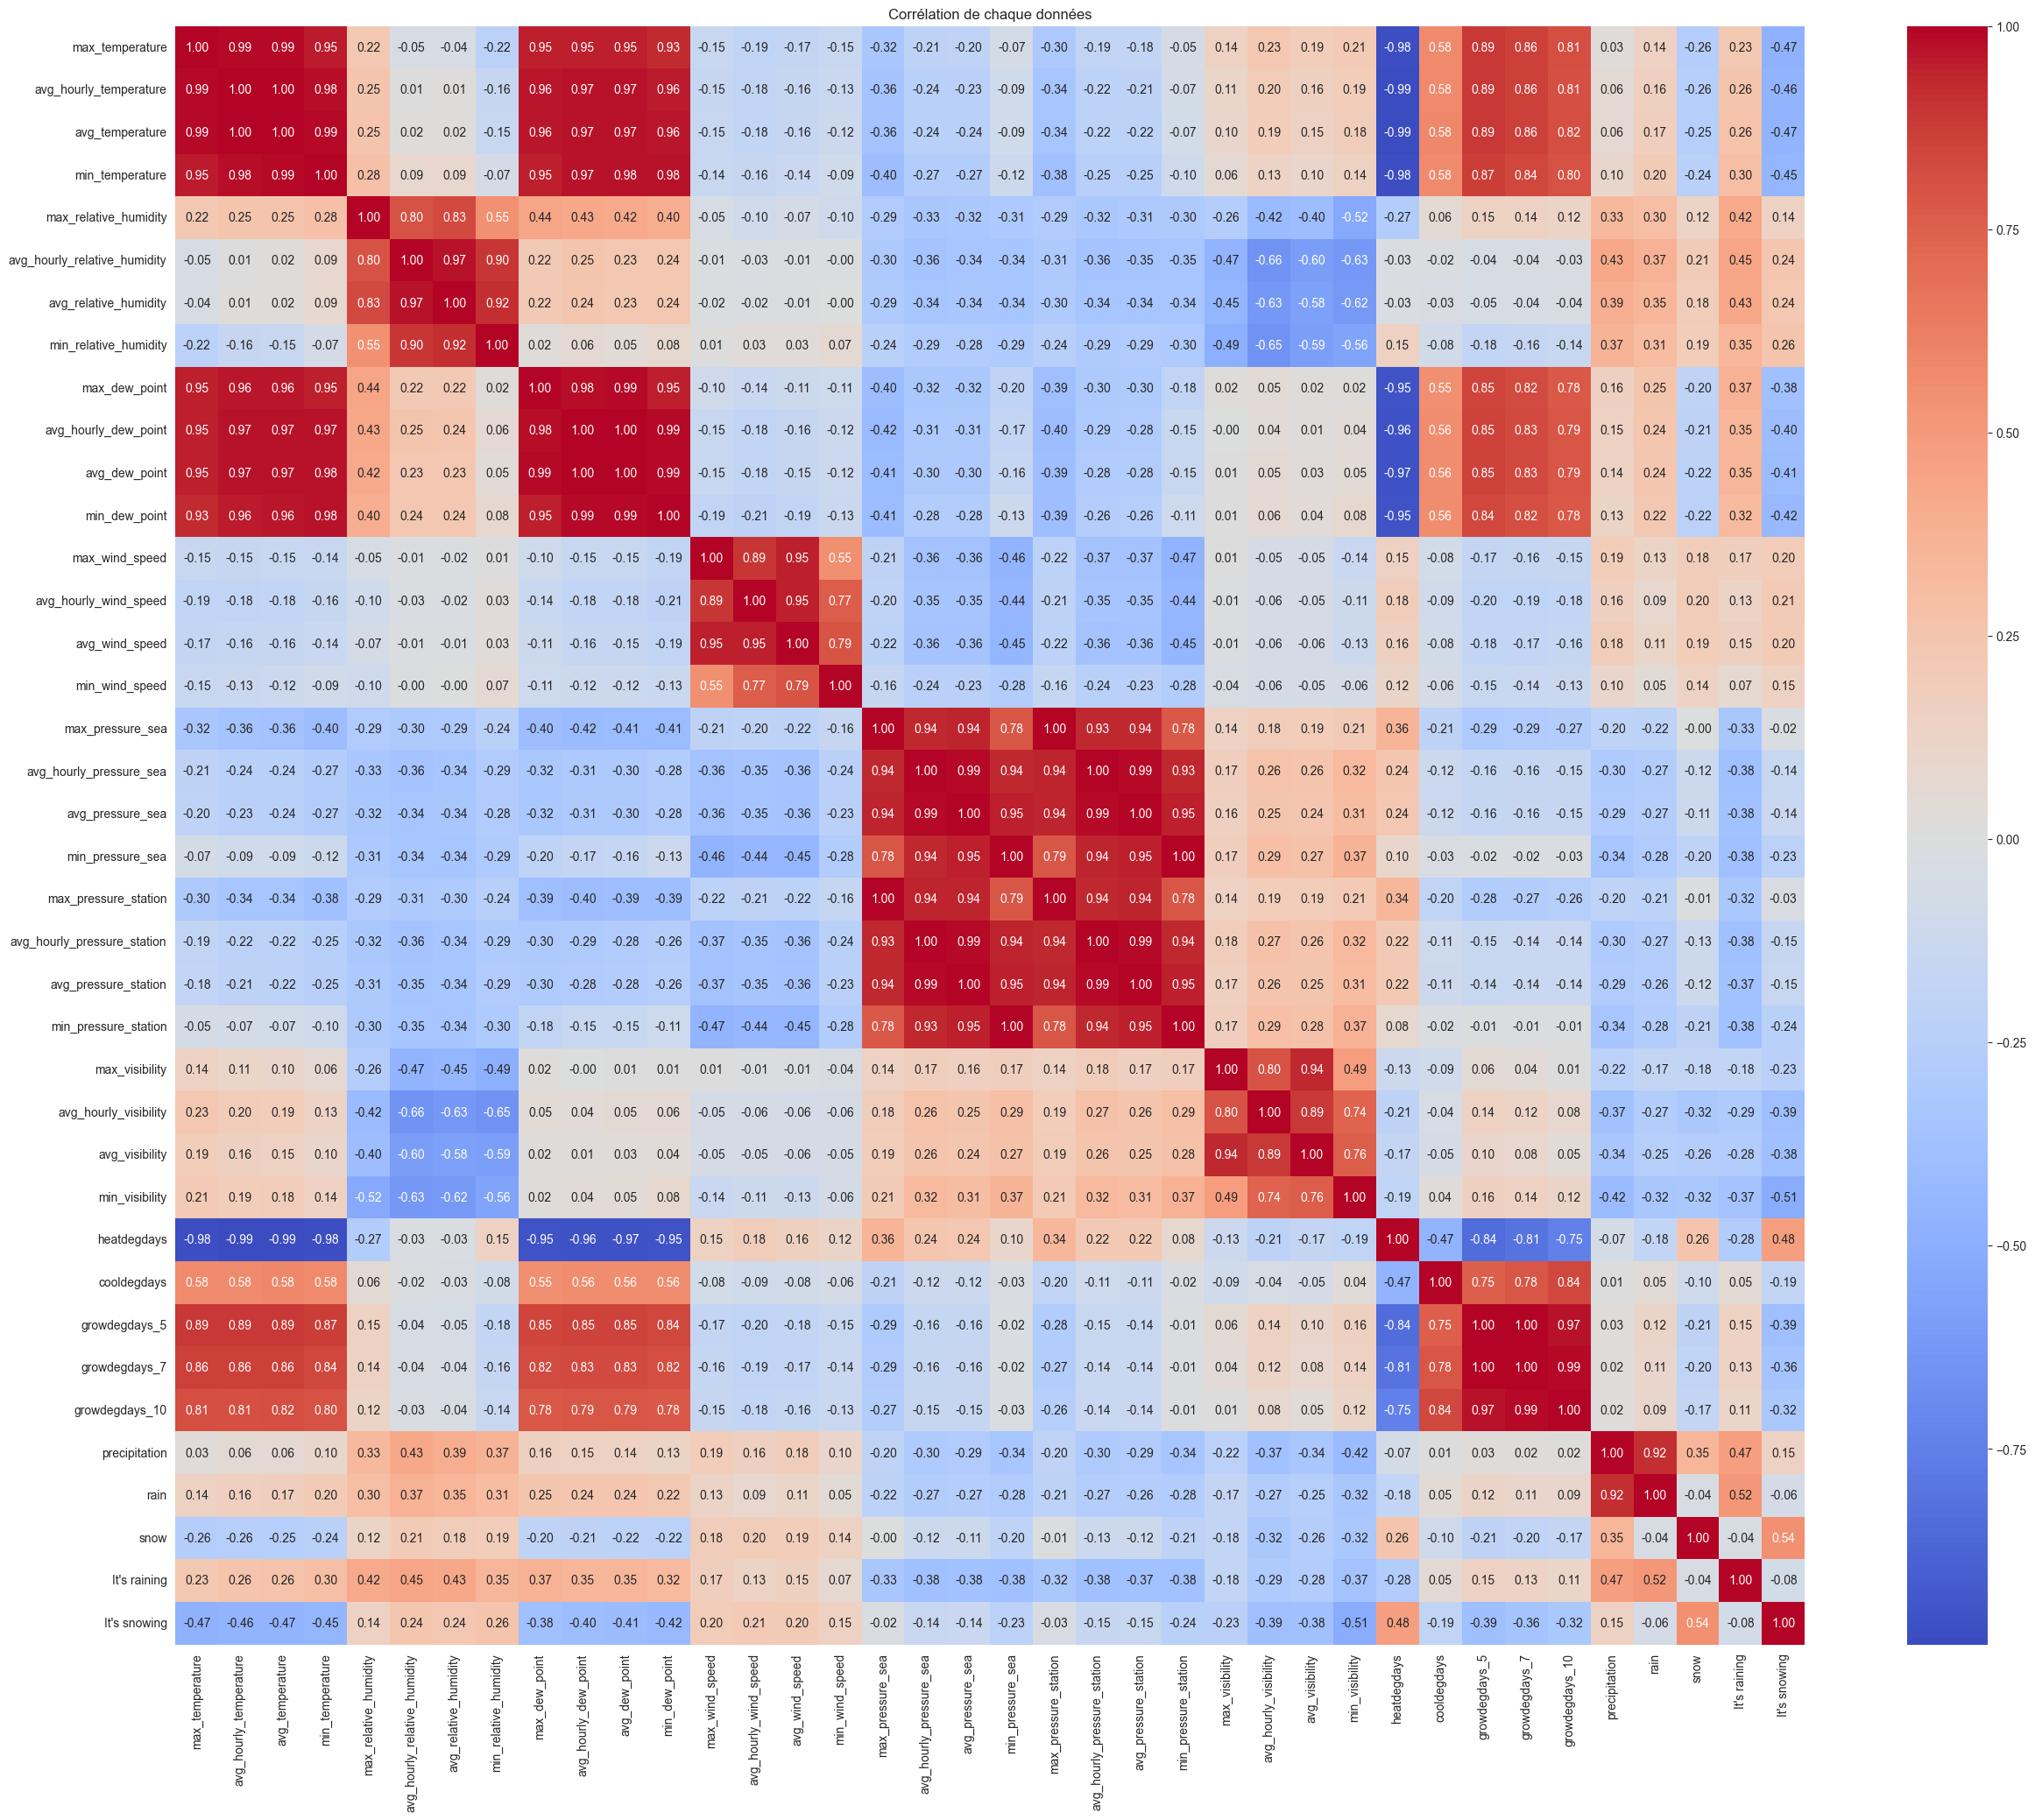

In [167]:
#La corrélation de chaque parametre.
plt.figure(figsize=(30,24))
sns.heatmap(base_donnees.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Corrélation de chaque données")
plt.show()

Traitement des données

In [168]:
base_donnees = base_donnees.drop(columns=['avg_hourly_temperature', 'avg_temperature','avg_hourly_dew_point','avg_dew_point','max_pressure_sea', 'avg_hourly_pressure_sea', 'avg_pressure_sea',
       'min_pressure_sea', 'max_pressure_station',
       'avg_hourly_pressure_station', 'avg_pressure_station',
       'min_pressure_station','growdegdays_5', 'growdegdays_7', 'growdegdays_10'])


In [169]:
#Séparer les données en majoritaire et minoritaire de It's raining et It's snowing.
base_donnees_majoriatire_pluie = base_donnees[base_donnees["It's raining"]==0]
base_donnees_minoritaire_pluie = base_donnees[base_donnees["It's raining"]==1]

base_donnees_majoriatire_neige = base_donnees[base_donnees["It's snowing"]==0]
base_donnees_minoritaire_neige = base_donnees[base_donnees["It's snowing"]==1]


In [170]:
print(base_donnees_majoriatire_pluie.shape)
print(base_donnees_minoritaire_pluie.shape)
print(base_donnees_majoriatire_neige.shape)
print(base_donnees_minoritaire_neige.shape)


(13568, 23)
(6617, 23)
(16920, 23)
(3265, 23)


In [171]:
#On égalise le nombre de données minoritaire a nos données majoritaire.

base_donnees_majoritaire_pluie_diminuee = resample(base_donnees_majoriatire_pluie,replace=False,n_samples=len(base_donnees_minoritaire_pluie),random_state=42)
base_donnees_majoritaire_neige_diminuee = resample(base_donnees_majoriatire_neige,replace=False,n_samples=len(base_donnees_minoritaire_neige),random_state=42)


In [172]:
base_donnees_diminuee_pluie = pd.concat([base_donnees_majoritaire_pluie_diminuee,base_donnees_minoritaire_pluie])
base_donnees_diminuee_neige = pd.concat([base_donnees_majoritaire_neige_diminuee,base_donnees_minoritaire_neige])
base_donnees_diminuee_neige.shape


(6530, 23)

In [173]:
#Mélanger mes données pour pas que mon modèle n'ai pas d'ordre en mémoire.
base_donnees_diminuee_pluie = base_donnees_diminuee_pluie.sample(frac=1,random_state=42).reset_index(drop=True)
base_donnees_diminuee_neige = base_donnees_diminuee_neige.sample(frac=1,random_state=42).reset_index(drop=True)
base_donnees_diminuee_pluie.head()

,max_temperature,min_temperature,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,max_dew_point,min_dew_point,max_wind_speed,avg_hourly_wind_speed,...,avg_hourly_visibility,avg_visibility,min_visibility,heatdegdays,cooldegdays,precipitation,rain,snow,It's raining,It's snowing
0,26.6,20.0,91,81.4,72.5,54,20.4,14.7,15,6.92,...,18695.8,16050,8000,0.0,5.3,0.0,0.0,0.0,0,0
1,-0.4,-3.9,91,78.6,76.0,61,-3.3,-8.3,9,4.29,...,16037.5,13700,2400,20.1,0.0,2.2,0.0,2.2,0,1
2,20.6,13.3,95,88.4,88.5,82,17.2,11.7,39,30.88,...,14825.0,18500,4800,1.1,0.0,10.4,10.4,0.0,1,0
3,20.3,10.9,81,66.5,63.5,46,10.8,7.7,32,18.62,...,32166.7,36200,24100,2.4,0.0,0.0,0.0,0.0,0,0
4,2.5,-3.0,79,66.2,66.5,54,-1.1,-8.7,48,34.71,...,24100.0,24100,24100,18.2,0.0,0.0,0.0,0.0,0,0


In [174]:
base_donnees_diminuee_pluie["It's raining"].value_counts()
base_donnees_diminuee_neige["It's snowing"].value_counts()


It's snowing
0    3265
1    3265
Name: count, dtype: int64

Création données de test et données pour l'entrainement

In [175]:
X_pluie = base_donnees_diminuee_pluie.drop(columns="It's raining")
y_pluie = base_donnees_diminuee_pluie["It's raining"]
print(X_pluie.shape[1])
print(y_pluie.shape[0])

X_neige = base_donnees_diminuee_neige.drop(columns="It's snowing")
y_neige = base_donnees_diminuee_neige["It's snowing"]

22
13234


In [176]:
#Séparer les bases de données d'entrainement et de test
X_train_pluie,X_test_pluie,y_train_pluie,y_test_pluie = train_test_split(X_pluie,y_pluie,test_size=0.2,random_state=42)

X_train_neige,X_test_neige,y_train_neige,y_test_neige = train_test_split(X_neige,y_neige,test_size=0.2, random_state=42)


***Entrainement du model de predicteur***


In [177]:
#Création de mon model et entrainement du model.
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {"n_estimators":[100,200],
                 "max_features":["sqrt"],
                 "max_depth":[None,10],
                 "min_samples_split":[2,5]
                 }



In [178]:
#Renforcement du model d'entrainement
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train_pluie,y_train_pluie)
grid_search_rf.fit(X_train_neige,y_train_neige)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'max_features': ['sqrt'],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=2)

***Nouveau model condensée Grid+RandomForest***

In [179]:
meilleur_model_rf = grid_search_rf.best_estimator_
print("Meilleur parametres du model Random Forest : ",grid_search_rf.best_params_)


Meilleur parametres du model Random Forest :  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


Évaluation du model

In [180]:
cv_score_pluie = cross_val_score(meilleur_model_rf,X_pluie,y_pluie,cv=5)
cv_score_neige = cross_val_score(meilleur_model_rf,X_neige,y_neige,cv=5)
print("Score pluie : ",np.mean(cv_score_pluie))
print("means score pluie : ", np.mean(cv_score_pluie))
print("Score neige : ",cv_score_neige)
print("means score neige : ", np.mean(cv_score_neige))

Score pluie :  0.9993199563332867
means score pluie :  0.9993199563332867
Score neige :  [0.99770291 1.         0.9992343  1.         0.9992343 ]
means score neige :  0.9992343032159265


Test pour voir la véracité du model

In [181]:
y_pred = None
if choix_predicteur == "S":
   y_pred  = meilleur_model_rf.predict(X_test_pluie)
   print("Test de la vérocité des données pluie : ",accuracy_score(y_test_pluie,y_pred))
   print("Test des confusions dans la matrix pluie : \n ",confusion_matrix(y_test_pluie,y_pred))
   print("Test probleme de classification : \n",classification_report(y_test_pluie,y_pred))
elif choix_predicteur == "N":
    y_pred = meilleur_model_rf.predict(X_test_neige)
    print("Test de la vérocité des données neige : ",accuracy_score(y_test_neige,y_pred))
    print("Test des confusions dans la matrix neige : \n ",confusion_matrix(y_test_neige,y_pred))
    print("Test probleme de classification : \n",classification_report(y_test_neige,y_pred))


else:
    print("Erreur dans la prédiction")


Test de la vérocité des données neige :  0.9992343032159265
Test des confusions dans la matrix neige : 
  [[644   1]
 [  0 661]]
Test probleme de classification : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       645
           1       1.00      1.00      1.00       661

    accuracy                           1.00      1306
   macro avg       1.00      1.00      1.00      1306
weighted avg       1.00      1.00      1.00      1306



In [ ]:
input_data =